In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
import xarray as xr
import pandas as pd
import cmocean.tools
import cartopy
import netCDF4 as netCDF
import matplotlib.colors as colors

from colorspacious import cspace_converter



pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator()

# fontsizes
fstiny = 6
fssmall = 8
fsmed = 10
fslarge = 12
fshuge = 14

In [2]:
!wget https://gist.githubusercontent.com/justiceamoh/0aca7df49c35fc0a38d2/raw/203d90bc8d3564a0700d5fa9a17e048731001d67/colormaps.py


--2020-06-15 11:05:09--  https://gist.githubusercontent.com/justiceamoh/0aca7df49c35fc0a38d2/raw/203d90bc8d3564a0700d5fa9a17e048731001d67/colormaps.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.48.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54389 (53K) [text/plain]
Saving to: ‘colormaps.py.1’

colormaps.py.1      100%[===================>]  53.11K  --.-KB/s    in 0.04s   

2020-06-15 11:05:09 (1.34 MB/s) - ‘colormaps.py.1’ saved [54389/54389]



In [3]:
import colorcet as cc
import palettable.lightbartlein.sequential as lbs 
import palettable.lightbartlein.diverging as lbd
import palettable.mycarta as myc
import palettable.colorbrewer.sequential as brews 
import palettable.colorbrewer.diverging as brewd
import palettable.scientific.diverging as scid
import palettable.scientific.sequential as scis
import colormaps as cl


In [4]:
def clean_ax(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)


## Colormap motivation

This image is after https://www.research.ibm.com/people/l/lloydt/color/color.HTM which isn't available online anymore but is reproduced here: https://github.com/frankMilde/interesting-reads/blob/master/ibm-research__why-should-engineers-and-scientists-be-worried-about-color.pdf

Global DEM data from: https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/cell_registered/netcdf/

In [5]:
!wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/cell_registered/netcdf/ETOPO1_Bed_c_gmt4.grd.gz

--2020-06-15 11:05:10--  https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/cell_registered/netcdf/ETOPO1_Bed_c_gmt4.grd.gz
Resolving www.ngdc.noaa.gov (www.ngdc.noaa.gov)... 140.172.190.1
Connecting to www.ngdc.noaa.gov (www.ngdc.noaa.gov)|140.172.190.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402477726 (384M) [application/x-gzip]
Saving to: ‘ETOPO1_Bed_c_gmt4.grd.gz’

ETOPO1_Bed_c_gmt4.g 100%[===================>] 383.83M  2.11MB/s    in 3m 13s  

2020-06-15 11:08:23 (1.99 MB/s) - ‘ETOPO1_Bed_c_gmt4.grd.gz’ saved [402477726/402477726]



In [7]:
fname = 'ETOPO1_Bed_c_gmt4.grd.gz'
ds = xr.open_dataset(fname)

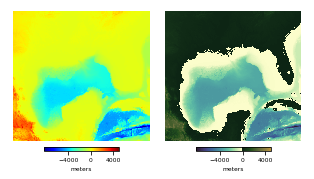

In [8]:
subset = ds.sel(x=slice(-100,-79), y=slice(17,35))  # SE
# subset = ds.sel(x=slice(-85,-65), y=slice(30,50))  # NE
# subset = ds.sel(x=slice(-130,-110), y=slice(30,50))  # west coast
z = subset.z
lon = subset.x
lat = subset.y

cmap = cmo.topo
cmin, cmax = z.min(), z.max()
newcmap = cmocean.tools.crop(cmap, cmin, cmax, 0, N=2000)


fig, axes = plt.subplots(1, 2, figsize=(171*0.8/25.4, 171*0.45/25.4), subplot_kw=dict(projection=merc))
ax = axes[0]
mappable = ax.pcolormesh(lon, lat, z, cmap=cmo.cm.jet, transform=pc)
ax.axis('equal')
clean_ax(ax)
ax.outline_patch.set_visible(False)
cb = fig.colorbar(mappable, ax=ax, orientation='horizontal', pad=0.01, shrink=0.5)
cb.set_label('meters', fontsize=fstiny)
cb.set_ticks([-4000,0,4000])
cb.ax.tick_params(labelsize=fstiny)

ax = axes[1]
mappable = ax.pcolormesh(lon, lat, z, cmap=newcmap, transform=pc)
ax.axis('equal')
clean_ax(ax)
ax.outline_patch.set_visible(False)
cb = fig.colorbar(mappable, ax=ax, orientation='horizontal', pad=0.01, shrink=0.5)
cb.set_label('meters', fontsize=fstiny)
cb.set_ticks([-4000,0,4000])
cb.ax.tick_params(labelsize=fstiny)

fig.subplots_adjust(wspace=0.02)

fig.savefig('figures/why.png', bbox_inches='tight', dpi=300)

## Perceptual uniformity

In [9]:
# cone plot
r = np.linspace(0, 1, 200)
theta = np.linspace(0, 2*np.pi, 150)
z = np.ones((r.size, theta.size)).T*np.linspace(2, 1, r.size)

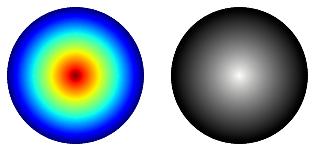

In [10]:
fig = plt.figure(figsize=(171*0.8/25.4, 171*0.45/25.4))

ax = fig.add_subplot(1,2,1, projection='polar')
ax.pcolormesh(theta, r, z.T, cmap=cmo.cm.jet)
clean_ax(ax)

ax = fig.add_subplot(1,2,2, projection='polar')
ax.pcolormesh(theta, r, z.T, cmap=cmo.gray)
clean_ax(ax)

fig.savefig('figures/cones.png', bbox_inches='tight', dpi=300)

# How to evaluate a colormap

* Peter Kovesi. Good Colour Maps: How to Design Them. arXiv:1509.03700 [cs.GR] 2015

In [44]:
# Kovesi
import sineramp
import normalize
im = sineramp.sineramp(sze=[180, 512], amp=12.5, wavelen=8, p=2);

In [45]:
# Perceptual deltas

def get_deltas(cmap, x, N):
    _sRGB1_to_uniform = cspace_converter("sRGB1", "CAM02-UCS")
    rgb = cmap(x)[np.newaxis, :, :3]
    Jpapbp = _sRGB1_to_uniform(rgb)[0]
    local_deltas = N * np.sqrt(np.sum((Jpapbp[:-1, :] - Jpapbp[1:, :]) ** 2, axis=-1))
    return local_deltas

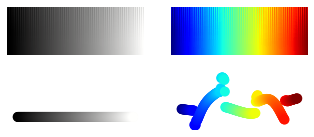

In [49]:
cmaps = cmo.gray, cmo.cm.jet

fig, axes = plt.subplots(2, len(cmaps), figsize=(171*0.8/25.4, 171*0.35/25.4))

# Kovesi plots
for ax, cmap in zip(axes[0,:],cmaps):
    ax.imshow(im, cmap=cmap)
    clean_ax(ax)


# Perceptual deltas
N = 256
x = np.linspace(0.0, 1.0, N)
for ax, cmap in zip(axes[1,:],cmaps):
    deltas = get_deltas(cmap, x, N)
    ax.scatter(x[1:], deltas, c=x[1:], cmap=cmap, s=100, linewidths=0.)
    ax.set_ylim(-50, 630)
    clean_ax(ax)

fig.savefig('figures/assess.png', bbox_inches='tight', dpi=300)
fig.savefig('figures/assess.pdf', bbox_inches='tight', dpi=300)

## High/low frequency (IBM)

In [14]:
x = np.linspace(0,6,2000)[np.newaxis,:].repeat(50, axis=0)
low = 0.5 + 0.05*np.sin(0.6*x**2)
high = 0.5 + 0.05*np.sin(10*x**2)

# jake: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
x = np.linspace(0, 6, 200)
y = np.linspace(0, 3, 100)[:, np.newaxis]
z = 10 * np.cos(x ** 2) * np.exp(-y)

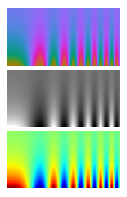

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(171*0.3/25.4, 171*0.5/25.4))
axes[0].pcolormesh(z, cmap=cmo.phase)
axes[1].pcolormesh(z, cmap=cmo.gray)
axes[2].pcolormesh(z, cmap=cmo.cm.jet)
for ax in axes:
    ax.axis('equal')
    clean_ax(ax)
fig.subplots_adjust(hspace=0.01)

fig.savefig('figures/freq.png', dpi=300, bbox_inches='tight')

# Colorspaces

Illustrate RGB and CAM02 and show how few colormaps move through

In [16]:
r = np.linspace(0,1,256)
R,G,B = np.meshgrid(r,r,r)

In [17]:
jp = np.linspace(5,95,101)
ap =  np.linspace(-40,40,108)
bp =  np.linspace(-40,40,100)
Jp, Ap, Bp = np.meshgrid(jp, ap, bp)
comb = np.stack((Jp,Ap,Bp), axis=-1)
cam2rgb = cspace_converter("CAM02-UCS", "sRGB1")
camrgb = cam2rgb(comb)

inan = (camrgb<0) | (camrgb>1)
camrgb[inan] = np.nan
# camrgb = np.clip(camrgb, 0, 1)

JpRGB, ApRGB, BpRGB = np.split(camrgb, 3, axis=-1)
JpRGB = JpRGB.squeeze()
ApRGB = ApRGB.squeeze()
BpRGB = BpRGB.squeeze()
inan1 = inan.any(axis=-1) 
Jp[inan1]=np.nan
Ap[inan1]=np.nan
Bp[inan1]=np.nan

rgb2cam = cspace_converter("sRGB1", "CAM02-UCS")


/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/colorspacious/ciecam02.py:398: RuntimeWarning: invalid value encountered in power
  / (400 - np.abs(RGBprime_a - 0.1))) ** (1 / 0.42))
/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/colorspacious/basics.py:28: RuntimeWarning: invalid value encountered in less_equal
  linear_portion = (C_linear <= 0.0031308)
/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Z contains NaN values. This may result in rendering artifacts.


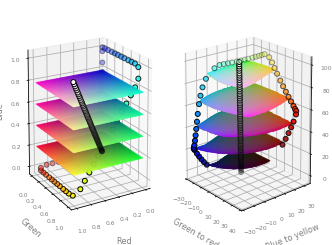

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(171*0.7/25.4, 171*0.5/25.4))

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2, projection='3d')

alpha = 0.5
nmark = 50
azims = [60, -40]#-65]#115]
elev = 15
namess = []

cmaps = [cmo.cm.jet, cmo.gray]
x = np.linspace(0.0, 1.0, nmark)

## RGB ##
slices = [50, 100, 150, 200]
# slices = [50, 125, 200]
for k in slices:
    c = np.stack((R[:,:,k], G[:,:,k], B[:,:,k]), axis=-1)
    ax1.plot_surface(R[:,:,k], G[:,:,k], B[:,:,k], facecolors=c, shade=False, alpha=alpha)
    
# Plot colormaps
for cmap in cmaps:
    rgb = cmap(x)[:, :3]
    ax1.scatter(rgb[:,0], rgb[:,1], rgb[:,2], color=rgb, s=25, edgecolors='k')
namess.append(['Red', 'Green', 'Blue'])


## CAM02-UCS ##
slices = [10, 30, 50, 70, 90]
for j in slices:
    c = np.stack((JpRGB[:,j,:], ApRGB[:,j,:], BpRGB[:,j,:]), axis=-1)
    ax2.plot_surface(Ap[:,j,:], Bp[:,j,:], Jp[:,j,:], facecolors=c, shade=False, alpha=alpha, vmin=0, vmax=1, rstride=1, cstride=1)

# Plot colormaps
for cmap in cmaps:
    rgb = cmap(x)[:, :3]
    cam = rgb2cam(rgb)
    ax2.scatter(cam[:,1], cam[:,2], cam[:,0], color=rgb, s=25, edgecolors='k')
namess.append(['Green to red', 'Blue to yellow', 'Lightness'])
ax2.set_xlim(-30,40)
ax2.set_ylim(-30,35)


for ax, names, azim in zip([ax1,ax2], namess, azims):
    n1, n2, n3 = names
    ax.view_init(azim=azim, elev=elev)
    ax.set_xlabel(n1, fontsize=fssmall, color='0.5')
    ax.set_ylabel(n2, fontsize=fssmall, color='0.5')
    ax.set_zlabel(n3, fontsize=fssmall, color='0.5', rotation=90)
    ax.tick_params(labelsize=fstiny, labelcolor='0.5', color='0.5')

fig.tight_layout()
fig.subplots_adjust(wspace=0.00, top=1.0)

fig.savefig('figures/cspace.png', dpi=300)

# Jet summary

Summary plot of jet colorbar with 
squiggles, 
Printed in grayscale
perceptual deltas,
Lightness, 
cone

In [19]:
# cone plot
r = np.linspace(0, 1, 200)
theta = np.linspace(0, 2*np.pi, 150)
z = np.ones((r.size, theta.size)).T*np.linspace(2, 1, r.size)

/Users/kthyng/miniconda3/envs/cart/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.


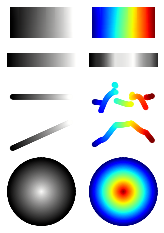

In [40]:
cmaps = [cmo.gray, cmo.cm.jet]

# fig, axes = plt.subplots(5, 2, figsize=(171*0.4/25.4, 171*0.6/25.4))

fig = plt.figure(constrained_layout=True, figsize=(171*0.4/25.4, 171*0.6/25.4))
gs = fig.add_gridspec(6, 2)

ax1, ax2 = fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])
# colormap with squiggles
for ax, cmap in zip([ax1, ax2],cmaps):
    ax.imshow(im, cmap=cmap)
    clean_ax(ax)


ax1, ax2 = fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])
# same but printed grayscale
for ax, cmap in zip([ax1, ax2],cmaps):
    J = rgb2cam(cmap(x)[:,:3])[:,0]
    ax.imshow(J[np.newaxis,:].repeat(50,axis=0), cmap=cmo.gray)
    clean_ax(ax)

    
# perceptual deltas
N = 256
x = np.linspace(0.0, 1.0, N)
ax1, ax2 = fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])
for ax, cmap in zip([ax1, ax2],cmaps):
    deltas = get_deltas(cmap, x, N)
    if cmap.name == 'gray':
        deltas += 200
    ax.scatter(x[1:], deltas, c=x[1:], cmap=cmap, s=25, linewidths=0.)
    ax.set_ylim(-50, 620)
    clean_ax(ax)


# lightness
ax1, ax2 = fig.add_subplot(gs[3, 0]), fig.add_subplot(gs[3, 1])
for ax, cmap in zip([ax1, ax2],cmaps):
    J = rgb2cam(cmap(x)[:,:3])[:,0]
    ax.scatter(x, J, c=x, cmap=cmap, s=25, linewidths=0.)
    ax.set_ylim(-10, 110)
    clean_ax(ax)


# cone
# axes[4,0].remove()
# axes[4,1].remove()
# axes[4,0] = fig.add_subplot(5,2,9,projection='polar')
# axes[4,1] = fig.add_subplot(5,2,10,projection='polar')
ax1, ax2 = fig.add_subplot(gs[4:, 0],projection='polar'), fig.add_subplot(gs[4:, 1],projection='polar')

for ax, cmap in zip([ax1, ax2],cmaps):
    ax.pcolormesh(theta, r, z.T, cmap=cmap)
    clean_ax(ax)

fig.savefig('figures/jet.png', dpi=300, bbox_inches='tight')
# fig.savefig('figures/jet.pdf', dpi=300, bbox_inches='tight')

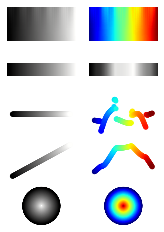

In [37]:
cmaps = [cmo.gray, cmo.cm.jet]

fig, axes = plt.subplots(5, 2, figsize=(171*0.4/25.4, 171*0.6/25.4))

# colormap with squiggles
for ax, cmap in zip(axes[0,:],cmaps):
    ax.imshow(im, cmap=cmap)
    clean_ax(ax)


# same but printed grayscale
for ax, cmap in zip(axes[1,:],cmaps):
    J = rgb2cam(cmap(x)[:,:3])[:,0]
    ax.imshow(J[np.newaxis,:].repeat(50,axis=0), cmap=cmo.gray)
    clean_ax(ax)

    
# perceptual deltas
N = 256
x = np.linspace(0.0, 1.0, N)
for ax, cmap in zip(axes[2,:],cmaps):
    deltas = get_deltas(cmap, x, N)
    if cmap.name == 'gray':
        deltas += 200
    ax.scatter(x[1:], deltas, c=x[1:], cmap=cmap, s=25, linewidths=0.)
    ax.set_ylim(-50, 620)
    clean_ax(ax)


# lightness
for ax, cmap in zip(axes[3,:],cmaps):
    J = rgb2cam(cmap(x)[:,:3])[:,0]
    ax.scatter(x, J, c=x, cmap=cmap, s=25, linewidths=0.)
    ax.set_ylim(-10, 110)
    clean_ax(ax)


# cone
axes[4,0].remove()
axes[4,1].remove()
axes[4,0] = fig.add_subplot(5,2,9,projection='polar')
axes[4,1] = fig.add_subplot(5,2,10,projection='polar')
for ax, cmap in zip(axes[4,:],cmaps):
    ax.pcolormesh(theta, r, z.T, cmap=cmap)
    clean_ax(ax)

fig.savefig('figures/jet.png', dpi=300, bbox_inches='tight')
fig.savefig('figures/jet.pdf', dpi=300, bbox_inches='tight')

## Examples for grayscale

### Global surface temperature

In [21]:
# Plot global temperature in multiple colormaps
loc = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst/sst.mnmean.v4.nc'
ds = xr.open_dataset(loc)

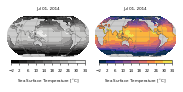

In [22]:
sub = ds.sst.sel(time='2014-7-1', method='nearest')

proj = cartopy.crs.Robinson(central_longitude=180)

cmaps = [cmo.gray, cmo.thermal]
fig, axes = plt.subplots(1, len(cmaps), figsize=(171*0.45/25.4, 171*0.2/25.4), subplot_kw=dict(projection=proj))

for ax, cmap in zip(axes,cmaps):
    ax.add_feature(cartopy.feature.LAND, facecolor='0.8')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='0.3', linewidth=0.25)
    mappable = ax.contourf(sub.lon, sub.lat, sub, cmap=cmap,
                           transform=pc,
                           levels=np.arange(-2, 35, 4))
    ax.gridlines(linewidth=0.3, color='gray', alpha=0.8, linestyle='-')
    ax.set_title(pd.Timestamp(sub.time.values).strftime('%b %d, %Y'), fontsize=4)
    cb = fig.colorbar(mappable, shrink=0.9, pad=0.03, ax=ax, orientation='horizontal')
    cb.set_label(r'Sea Surface Temperature [$^\circ\!$C]', fontsize=4)
    cb.ax.tick_params(labelsize=4, width=0.5, size=2)
    cb.outline.set_linewidth(0.5)
    ax.outline_patch.set_visible(False)

fig.subplots_adjust(wspace=0.07)
fig.savefig('figures/temp.png', bbox_inches='tight', dpi=300)


### Global surface salinity

In [23]:
url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplAquariusSSSMonthlyV5'
ds = xr.open_dataset(url)

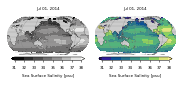

In [24]:
sub = ds.sss.sel(time='2014-7-1', method='nearest')

proj = cartopy.crs.Robinson(central_longitude=180)

cmaps = [cmo.gray, cmo.haline]
fig, axes = plt.subplots(1, len(cmaps), figsize=(171*0.45/25.4, 171*0.2/25.4), subplot_kw=dict(projection=proj))

for ax, cmap in zip(axes,cmaps):
    ax.add_feature(cartopy.feature.LAND, facecolor='0.8')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='0.3', linewidth=0.25)
    mappable = ax.contourf(sub.longitude, sub.latitude, sub, cmap=cmap,
                           transform=pc, levels=np.linspace(31, 38, 8), extend='both')
    ax.gridlines(linewidth=0.3, color='gray', alpha=0.8, linestyle='-')
    ax.set_title(pd.Timestamp(sub.time.values).strftime('%b %d, %Y'), fontsize=4)
    cb = fig.colorbar(mappable, shrink=0.9, pad=0.03, ax=ax, orientation='horizontal')
    cb.set_label(r'Sea Surface Salinity [psu]', fontsize=4)
    cb.ax.tick_params(labelsize=4, width=0.5, size=2)
    cb.outline.set_linewidth(0.5)
    ax.outline_patch.set_visible(False)

fig.subplots_adjust(wspace=0.07)
fig.savefig('figures/sss.png', bbox_inches='tight', dpi=300)

# Available colormaps

Plot as lightness only.

Include: Matplotlib, cividis, Cubehelix, Light & Bartlein, MyCarta, cmocean
Kovesi (https://www.peterkovesi.com/matlabfns/index.html#colour), accessed through colorcet (https://colorcet.holoviz.org/)
Brewer, Fabio crameri

accessed several packages through palettable (https://jiffyclub.github.io/palettable/)

In [25]:
cmapsall = {}

key = 'matplotlib'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.cm.viridis, cmo.cm.magma, cmo.cm.plasma, cmo.cm.inferno]
cmapsall[key]['reference'] = 'doi.org/10.5281/zenodo.3264781, bids.github.io/colormap/'

key = 'civ'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.cm.cividis]
cmapsall[key]['reference'] = 'doi.org/10.1371/journal.pone.0199239' #['https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239']

key = 'cube'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.cm.cubehelix]
cmapsall[key]['reference'] = 'mrao.cam.ac.uk/~dag/CUBEHELIX/'

key = 'twilight'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.cm.twilight]
cmapsall[key]['reference'] = 'github.com/bastibe/twilight'

key = 'MATLAB'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.cm.bone, cmo.cm.pink, cmo.cm.spring, cmo.cm.summer, cmo.cm.autumn, cmo.cm.winter, cmo.cm.cool, cmo.cm.hot, cmo.cm.copper, cl.parula]
cmapsall[key]['reference'] = 'mathworks.com/help/matlab/colors-1.html'

key = 'cmocean'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cmo.thermal, cmo.haline, cmo.solar, cmo.gray, cmo.deep, cmo.dense, cmo.algae, cmo.matter, cmo.turbid, cmo.rain,
          cmo.phase,
          cmo.topo, cmo.balance, cmo.delta, cmo.curl, cmo.diff, cmo.tarn]
cmapsall[key]['reference'] = 'doi.org/10.5670/oceanog.2016.66, matplotlib.org/cmocean/'

key = 'Peter Kovesi'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [cc.cm.bgy, cc.cm.kbc, cc.cm.bmy, cc.cm.kgy, cc.cm.CET_CBL1, cc.cm.fire,
                          cc.cm.bjy, cc.cm.CET_C2, cc.cm.CET_D10, cc.cm.isolum, cc.cm.bky, cc.cm.CET_D13, cc.cm.CET_D1A, cc.cm.CET_R3, cc.cm.colorwheel]
cmapsall[key]['reference'] = 'arxiv.org/abs/1509.03700, peterkovesi.com/projects/colourmaps/'

key = 'mycarta'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [myc.Cube1_20.mpl_colormap, myc.CubeYF_20.mpl_colormap, myc.LinearL_20.mpl_colormap]
cmapsall[key]['reference'] = 'mycarta.wordpress.com/color-palettes/'

key = 'Light & Bartlein'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [lbs.Blues10_2.mpl_colormap,
                 lbd.BlueDarkOrange18_18.mpl_colormap, lbd.BlueGray_8.mpl_colormap, lbd.BlueGreen_14.mpl_colormap, lbd.BlueOrange10_10.mpl_colormap, lbd.BrownBlue10_10.mpl_colormap, lbd.GreenMagenta_16.mpl_colormap, lbd.RedYellowBlue_11.mpl_colormap]
cmapsall[key]['reference'] = 'doi.org/10.1029/2004EO400002, geog.uoregon.edu/datagraphics/color_scales.htm'

key = 'Color Brewer: Sequential'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [brews.Blues_9.mpl_colormap, brews.BuGn_9.mpl_colormap, brews.BuPu_9.mpl_colormap, brews.GnBu_9.mpl_colormap, brews.Greens_9.mpl_colormap, brews.Greys_9.mpl_colormap, brews.OrRd_9.mpl_colormap, brews.Oranges_9.mpl_colormap, brews.PuBu_9.mpl_colormap, brews.PuBuGn_9.mpl_colormap, brews.PuRd_9.mpl_colormap, brews.Purples_9.mpl_colormap, brews.RdPu_9.mpl_colormap, brews.Reds_9.mpl_colormap, brews.YlGn_9.mpl_colormap, brews.YlGnBu_9.mpl_colormap, brews.YlOrBr_9.mpl_colormap, brews.YlOrRd_9.mpl_colormap]
cmapsall[key]['reference'] = 'colorbrewer2.org'

key = 'Color Brewer: Diverging'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [brewd.BrBG_11.mpl_colormap, brewd.PRGn_11.mpl_colormap, brewd.PiYG_11.mpl_colormap, brewd.PuOr_11.mpl_colormap, brewd.RdBu_11.mpl_colormap, brewd.RdGy_11.mpl_colormap, brewd.RdYlBu_11.mpl_colormap, brewd.RdYlGn_11.mpl_colormap, brewd.Spectral_11.mpl_colormap]
cmapsall[key]['reference'] = ''

key = 'Scientific: Sequential'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [scis.Acton_20.mpl_colormap, scis.Bamako_20.mpl_colormap, scis.Batlow_20.mpl_colormap, scis.Bilbao_20.mpl_colormap, scis.Buda_20.mpl_colormap, scis.Davos_20.mpl_colormap, scis.Devon_20.mpl_colormap, scis.Hawaii_20.mpl_colormap, scis.Imola_20.mpl_colormap, scis.LaJolla_20.mpl_colormap, scis.LaPaz_20.mpl_colormap, scis.Nuuk_20.mpl_colormap, scis.Oslo_20.mpl_colormap, scis.Tokyo_20.mpl_colormap, scis.Turku_20.mpl_colormap]
cmapsall[key]['reference'] = 'doi.org/10.5194/gmd-11-2541-2018, fabiocrameri.ch/colourmaps.php'

key = 'Scientific: Diverging'
cmapsall[key] = {}
cmapsall[key]['cmaps'] = [scid.Berlin_20.mpl_colormap, scid.Broc_20.mpl_colormap, scid.Cork_20.mpl_colormap, scid.Lisbon_20.mpl_colormap, scid.Roma_20.mpl_colormap, scid.Tofino_20.mpl_colormap, scid.Vik_20.mpl_colormap, scis.Oleron_20.mpl_colormap]
cmapsall[key]['reference'] = ''


In [26]:
# match up items that will be plotted together by row
ccatss = [['matplotlib', 'civ', 'cube', 'twilight', 'MATLAB', 'mycarta'],
         ['cmocean'],
         ['Peter Kovesi', 'Light & Bartlein'],
         ['Color Brewer: Sequential'],
         ['Scientific: Sequential'],
         ['Color Brewer: Diverging','Scientific: Diverging']]
ias = np.arange(0,len(ccatss)) 

ccattitles = ['matplotlib', 'MATLAB', 'mycarta',
             'cmocean',
             'Peter Kovesi', 'Light & Bartlein',
             'Color Brewer: Sequential', 'Color Brewer: Diverging',
             'Scientific: Sequential', 'Scientific: Diverging']
reflocs = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8]

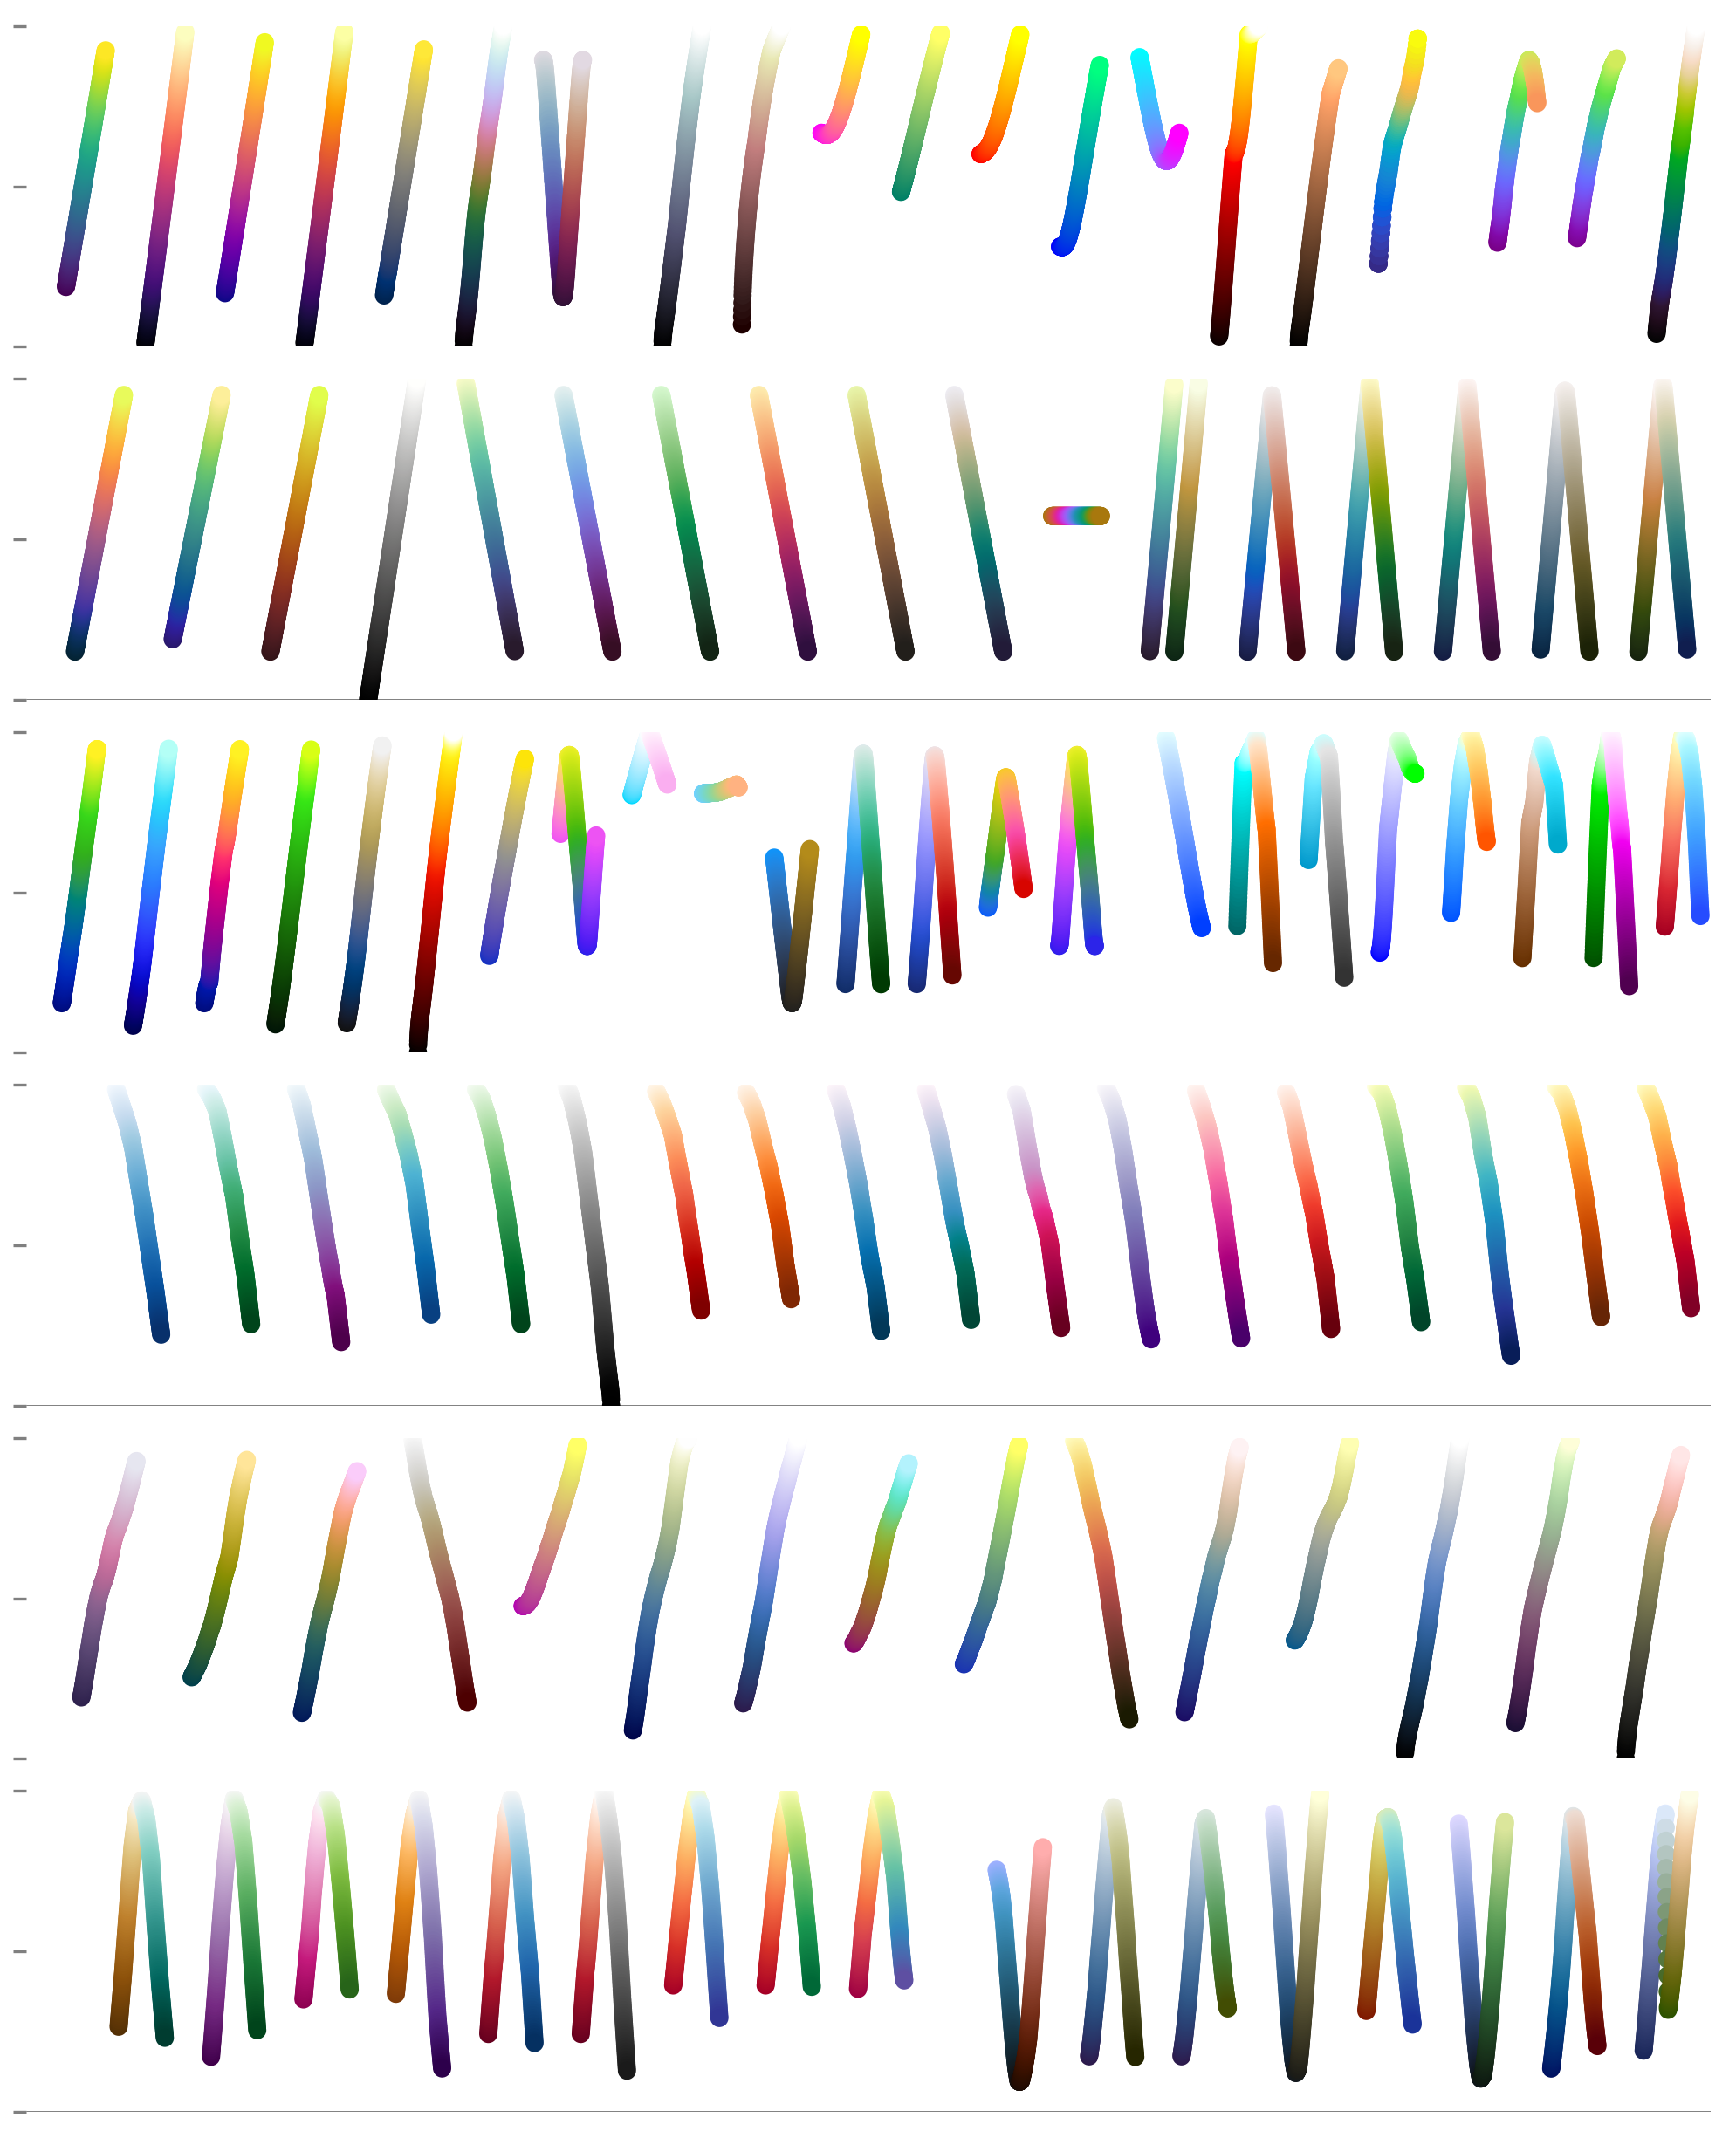

In [27]:
fig, axes = plt.subplots(len(ias),1,figsize=(171/25.4,210/25.4), dpi=300)

dxs = []
irefsall = 1
for ia, ccats in zip(ias,ccatss):
    irefrow = 0
    dx = 0.0
    ax=axes[ia]
    
    if ia in [3,5]:
        dx += 1
    
    for i, ccat in enumerate(ccats):
        cmaps = cmapsall[ccat]['cmaps']
        ref = cmapsall[ccat]['reference']

        # vertical label for colormap grouping
        if ccat in ccattitles:
            dx += 1
            

        for i, cmap in enumerate(cmaps):

            # plot colormap as lightness
            J = rgb2cam(cmap(x)[:,:3])[:,0]
            ax.scatter(x+dx, J, c=x, cmap=cmap, s=25, linewidths=0.)

            dx += 2
    dxs.append(dx)
       
i = 0
for ax,dx in zip(axes,dxs):
    ax.set_xlim(0,dx*0.985)
    ax.set_ylim(0,100)
    ax.set_xticks([])
    ax.set_frame_on(False)
    ax.tick_params(labelsize=fstiny, labelcolor='0.5', color='0.5')
    ax.set_yticks([0,50,100])
    if i==len(ias):
        ax.set_yticklabels(['0','','100'])
    else:
        ax.set_yticklabels([])
    ax.hlines([0], 0, dx, linewidth=0.7, color='k', alpha=0.5)
    i += 1
    
fig.tight_layout()
fig.subplots_adjust(hspace=0.1)

fig.savefig('figures/allmaps.png', dpi=300)
fig.savefig('figures/allmaps.pdf')

# How to choose a colormap for your data

- Critical points/sequential vs diverging vs cyclic
- perceptual uniformity or purposeful breaks therein
- Intuition
- Use lightness to map data form

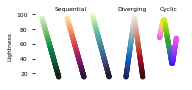

In [157]:
cmaps = [cmo.algae, cmo.matter, cmo.deep, cmo.balance, cc.cm.CET_C2]
x = np.linspace(0.0, 1.0, 256)


fig, ax = plt.subplots(1,1,figsize=(171*0.4/25.4, 171*0.2/25.4))
dx = 0
for cmap in cmaps:
    J = rgb2cam(cmap(x)[:,:3])[:,0]
    ax.scatter(x+dx, J, c=x, cmap=cmap, s=25, linewidths=0.)
    if cmap.name in ['algae','matter']:
        dx += 1.5
    else:
        dx += 2
    
ax.set_ylabel('Lightness', fontsize=fstiny)
ax.set_xticks([])
ax.set_frame_on(False)
ax.tick_params(labelsize=fstiny)

ax.text(0.75,105,'Sequential', fontsize=fstiny)
ax.text(4.5,105,'Diverging', fontsize=fstiny)
ax.text(7,105,'Cyclic', fontsize=fstiny)
# ax.text(11,105,'Cyclic', fontsize=fstiny)

fig.savefig('figures/cats.pdf', bbox_inches='tight', dpi=300)
fig.savefig('figures/cats.png', bbox_inches='tight', dpi=300)


## Sequential Example: Chlorophyll-a

In [162]:
# https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMBchlamday.html
url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMBchlamday'
ds = xr.open_dataset(url)

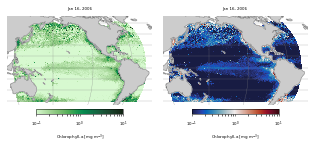

In [176]:
sub = ds.chlorophyll.isel(latitude=slice(0,-1,5), longitude=slice(0,-1,5), altitude=0, time=0)#.sel(time='2020-3-1', method='nearest')#.squeeze()#, time=0)

proj = cartopy.crs.Robinson(central_longitude=180)

cmaps = [cmo.algae, cmo.balance]
fig, axes = plt.subplots(1, len(cmaps), figsize=(171*0.8/25.4, 171*0.375/25.4), subplot_kw=dict(projection=proj))

for ax, cmap in zip(axes,cmaps):
    mappable = ax.pcolormesh(sub.longitude, sub.latitude, sub, cmap=cmap,
                           transform=pc,
                           norm=colors.LogNorm(vmin=0.1, vmax=10))
    ax.gridlines(linewidth=0.3, color='gray', alpha=0.8, linestyle='-')
    ax.set_title(pd.Timestamp(sub.time.values).strftime('%b %d, %Y'), fontsize=4)
    ax.add_feature(cartopy.feature.LAND, facecolor='0.8', zorder=10)
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='0.3', linewidth=0.25, zorder=10)
    cb = fig.colorbar(mappable, shrink=0.6, pad=0.03, ax=ax, orientation='horizontal')
    cb.set_label(r'Chlorophyll-a [mg m$^{-3}$]', fontsize=4)
    cb.ax.tick_params(labelsize=4, width=0.5, size=2)
    cb.outline.set_linewidth(0.5)
    ax.outline_patch.set_visible(False)

fig.subplots_adjust(wspace=0.07)
fig.savefig('figures/chlor.png', bbox_inches='tight', dpi=300)


## Diverging Example

In [31]:
!wget https://geo.gcoos.org/data/ssh/gom/ssh_gom_2015.nc

--2020-06-15 11:16:32--  https://geo.gcoos.org/data/ssh/gom/ssh_gom_2015.nc
Resolving geo.gcoos.org (geo.gcoos.org)... 67.207.88.241
Connecting to geo.gcoos.org (geo.gcoos.org)|67.207.88.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25556574 (24M) [application/octet-stream]
Saving to: ‘ssh_gom_2015.nc’

ssh_gom_2015.nc     100%[===================>]  24.37M  4.19MB/s    in 5.9s    

2020-06-15 11:16:38 (4.12 MB/s) - ‘ssh_gom_2015.nc’ saved [25556574/25556574]



In [140]:
ds = xr.open_dataset('ssh_gom_2015.nc', mask_and_scale=False)

sub = ds['SeaSurfaceHeightAnomaly'].sel(time='2015-8-4').isel(trajectory=0)

In [141]:
# sub = np.ma.masked_where(sub, sub>1000)
lon = ds.longitude.squeeze().values
lat = ds.latitude.squeeze().values

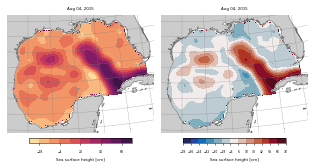

In [144]:
# Plot sea surface height
# https://geo.gcoos.org/ssh/
proj = cartopy.crs.LambertConformal()
l10 = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face', facecolor='0.8')
c10 = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m', linewidth=0.4,
                                        edgecolor='0.4', facecolor='none')
cmaps = [cmo.matter, cmo.balance]
fig, axes = plt.subplots(1, len(cmaps), figsize=(171*0.8/25.4, 171*0.45/25.4), subplot_kw=dict(projection=proj))

for ax, cmap in zip(axes, cmaps):
    ax.add_feature(l10)
    ax.add_feature(c10)
    if cmap.name == 'balance':
        mappable = ax.contourf(lon, lat, sub, cmap=cmap, transform=pc, 
                               levels=np.arange(-78, 90, 12))
        cb = fig.colorbar(mappable, shrink=0.7, pad=0.03, ax=ax, orientation='horizontal')
        cb.set_ticks(np.arange(-78, 90, 12))
    else:
        mappable = ax.contourf(lon, lat, sub, cmap=cmap, transform=pc, levels=np.linspace(-40, 80, 11))
        cb = fig.colorbar(mappable, shrink=0.7, pad=0.03, ax=ax, orientation='horizontal')
    ax.gridlines(linewidth=0.3, color='gray', alpha=0.8, linestyle='-')
    ax.set_title(pd.Timestamp(sub.time.values).strftime('%b %d, %Y'), fontsize=4)
    cb.set_label(r'Sea surface height [cm]', fontsize=4)
    cb.ax.tick_params(labelsize=3, width=0.5, size=2)
    cb.outline.set_linewidth(0.5)
    ax.outline_patch.set_visible(False)
    
fig.subplots_adjust(wspace=0.05)
fig.savefig('figures/ssh.png', bbox_inches='tight', dpi=300)


## Cyclic Example

In [159]:
# Request data from http://volkov.oce.orst.edu/tides/noserv.html
# Info here: http://volkov.oce.orst.edu/tides/global.html
ds = xr.open_dataset('h_tpxo7.2.nc')

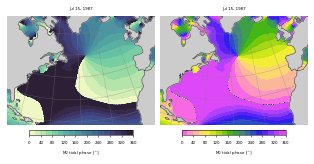

In [160]:
# sub = ds.ha.isel(nc=0, ny=slice(0,-1,2), nx=slice(0,-1,2))
# ph = np.rad2deg(np.arctan2(sub.v, sub.u))

# Plot wind direction
proj = cartopy.crs.AlbersEqualArea(central_longitude=-50)

cmaps = [cmo.deep, cc.cm.CET_C2]
fig, axes = plt.subplots(1, len(cmaps), figsize=(171*0.8/25.4, 171*0.45/25.4), subplot_kw=dict(projection=proj))

for ax, cmap in zip(axes,cmaps):
    ax.set_extent([-80, -10, 15, 65], cartopy.crs.Geodetic())
#     mappable = ax.pcolormesh(ds.lon_z, ds.lat_z, ds.hp.isel(nc=0),cmap=cmap, transform=pc)#,
#                         #    levels=np.linspace(0, 360, 10))
    mappable = ax.contourf(ds.lon_z, ds.lat_z, ds.hp.isel(nc=0), 20,cmap=cmap,
                           transform=pc)#,
#     ax.contour(ds.lon_z, ds.lat_z, ds.hp.isel(nc=0), np.arange(0,360, 40), colors='k', linewidths=0.2, transform=pc)
    ax.gridlines(linewidth=0.3, color='gray', alpha=0.8, linestyle='-')
    ax.add_feature(cartopy.feature.LAND, facecolor='0.8', zorder=10)
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='0.2', zorder=10, linewidth=0.5)
    ax.set_title(pd.Timestamp(ph.time.values).strftime('%b %d, %Y'), fontsize=4)
    cb = fig.colorbar(mappable, shrink=0.7, pad=0.03, ax=ax, orientation='horizontal')
    cb.set_label(r'M$_2$ tidal phase [$^\circ$]', fontsize=4)
    cb.ax.tick_params(labelsize=4, width=0.5, size=2)
    cb.outline.set_linewidth(0.5)
    ax.outline_patch.set_visible(False)
    
fig.subplots_adjust(wspace=0.03)
fig.savefig('figures/phase.png', bbox_inches='tight', dpi=300)
